In [330]:
import numpy as np
import os
from glob import glob
import ase, ase.io
import matplotlib.pyplot as plt

In [348]:
class CastepBands:
    def __init__(self, atoms_in, bands_file: str) :
        self.bands_file_name = bands_file
        self.whole_bands_file = !less $bands_file
        self.number_of_atoms = len(atoms_in)
        self.get_branches()
    def get_branches(self):
        loc=[] ; kpath=[] ; branch=[] ; ordering=[]
        for i, val in enumerate(self.whole_bands_file):
            if 'Spin' in val: loc.append(i)
        for i, val in enumerate(loc):
            kpath.append(self.whole_bands_file[val-1].split()[2:5])
            ordering.append(int(self.whole_bands_file[val-1].split()[1]))
        for i, j in zip(loc[0:-1], loc[1:]):
            branch.append(np.array(self.whole_bands_file[i+1:j-1], dtype=float))
        branch.append(np.array(self.whole_bands_file[loc[-1]+1:], dtype=float))
        branch=np.array(branch)
        kpath=np.array(kpath)
        branch_order = np.zeros(branch.shape)
        kpath_order = np.zeros(kpath.shape)
        for i, val in enumerate(ordering):
            branch_order[val-1,:] = branch[i,:] #-1 to get indexing to start from 0
            kpath_order[val-1,:] = kpath[i,:]
        self.kpath = kpath_order ; self.branch = branch_order

In [349]:
atoms = ase.io.read('../unopt_xyzs/BeC_tube+wire.xyz')
A = CastepBands(atoms,'BeC_tube+wire_0800ev.bands')

<IPython.core.display.Javascript object>


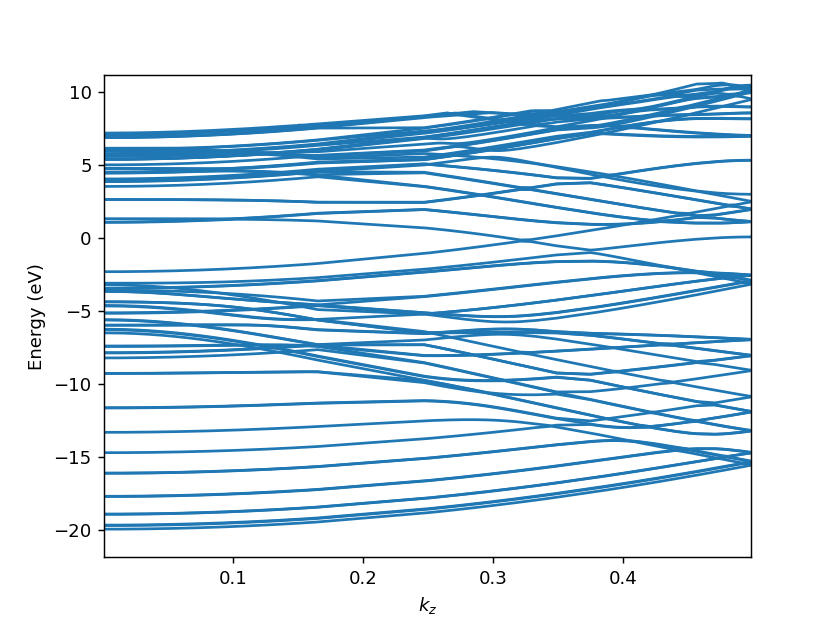

Text(0, 0.5, 'Energy (eV)')

In [354]:
%matplotlib notebook
plt.plot(A.kpath[:,2], (A.branch+0.074542)*ase.units.Ha, '-', color='C0')
plt.xlim([0,max(A.kpath[:,2])])
plt.xlabel('$k_{z}$')
plt.ylabel('Energy (eV)')

In [347]:
A.kpath

array([[ 0.   , -0.497,  0.004],
       [ 0.   , -0.493,  0.004],
       [ 0.   , -0.489,  0.004],
       [ 0.   , -0.485,  0.004],
       [ 0.   , -0.483,  0.004],
       [ 0.   , -0.479,  0.004],
       [ 0.   , -0.469,  0.004],
       [ 0.   , -0.467,  0.004],
       [ 0.   , -0.465,  0.004],
       [ 0.   , -0.463,  0.004],
       [ 0.   , -0.461,  0.004],
       [ 0.   , -0.459,  0.004],
       [ 0.   , -0.455,  0.004],
       [ 0.   , -0.453,  0.004],
       [ 0.   , -0.449,  0.004],
       [ 0.   , -0.447,  0.004],
       [ 0.   , -0.445,  0.004],
       [ 0.   , -0.443,  0.004],
       [ 0.   , -0.437,  0.004],
       [ 0.   , -0.435,  0.004],
       [ 0.   , -0.433,  0.004],
       [ 0.   , -0.431,  0.004],
       [ 0.   , -0.427,  0.004],
       [ 0.   , -0.423,  0.004],
       [ 0.   , -0.419,  0.004],
       [ 0.   , -0.417,  0.004],
       [ 0.   , -0.415,  0.004],
       [ 0.   , -0.411,  0.004],
       [ 0.   , -0.407,  0.004],
       [ 0.   , -0.401,  0.004],
       [ 0